[ 269.06633741  359.9042001 ]
90.8378626852
[  90.07958048  359.88994511]
269.810364637
[ 180.85050236  269.55282579]
88.7023234315
[ 179.30200368   89.60279566]
89.699208018
[ 269.06633741  359.9042001 ]
90.8378626852
[  90.07958048  359.88994511]
269.810364637
[ 180.85050236  269.55282579]
88.7023234315
[ 179.30200368   89.60279566]
89.699208018
[ 269.06633741  359.9042001 ]
90.8378626852
[  90.07958048  359.88994511]
269.810364637
[ 180.85050236  269.55282579]
88.7023234315
[ 179.30200368   89.60279566]
89.699208018
[ 269.06633741  359.9042001 ]
90.8378626852
[  90.07958048  359.88994511]
269.810364637
[ 180.85050236  269.55282579]
88.7023234315
[ 179.30200368   89.60279566]
89.699208018
[ 269.06633741  359.9042001 ]
90.8378626852
[  90.07958048  359.88994511]
269.810364637
[ 180.85050236  269.55282579]
88.7023234315
[ 179.30200368   89.60279566]
89.699208018
[ 269.06633741  359.9042001 ]
90.8378626852
[  90.07958048  359.88994511]
269.810364637
[ 180.85050236  269.55282579]
88.7023

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


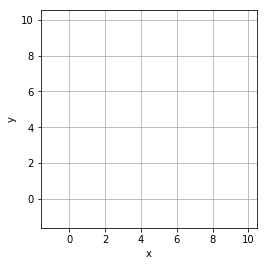

In [22]:
import numpy as np
import matplotlib.pyplot as py
from math import acos

def cubic_latice(N_particles):
    pos_at_0=np.array(np.meshgrid(range(np.int(N_particles**.5)), range(np.int(N_particles**.5)))).T.reshape(-1, 2)
    deviations = np.random.rand(N_particles,2)*0.05
    pos_at_0 = pos_at_0*2 + deviations
    
    return(pos_at_0)

def orientation_at_0():

def size_of_particles(N_particles, mean, standard_deviation):
    radii = (np.random.normal(mean,standard_deviation,N_particles))
    return(radii)

def check_for_neighbors(pos,colours):
    bisection = np.zeros(len(pos))
    for i in range(len(pos)): # loop through particles
        dis_particles = (np.power(pos[i,0]-pos[:,0],2)+np.power(pos[i,1]-pos[:,1],2))**0.5
        neighbors = np.array(np.logical_and(dis_particles<2.7,abs(dis_particles>0.1))).nonzero()
        angles = np.zeros(len(neighbors[0]))
        for j in range(len(neighbors[0])):

            difference_vector = [pos[neighbors[0][j],0]-pos[i,0],pos[neighbors[0][j],1] - pos[i,1]]

            angles[j] = (calculate_angle_wrt_x_axis(difference_vector))
        if i == 0 or i == 4 or i == 20 or i == 24:
            colours[i] = '-y'
            print(angles)
            print(abs(np.amax(angles) - np.amin(angles)))
        
        if (abs(np.amax(angles) - np.amin(angles)) <= 180):
            bisection[i] = (max(angles)+min(angles))/2
            colours[i] = '-b'
        
        else:
            bisection[i] = 90       
    return(colours, bisection)
        
def update_position(position, colours):
    colours, bisection = check_for_neighbors(position,colours)
    position += 0.1
    return(position, colours, bisection)

def calculate_angle_wrt_x_axis(v):
    # see first answer: https://stackoverflow.com/questions/31735499/calculate-angle-clockwise-between-two-points

    norm_v = np.linalg.norm(v)
    
    cosx=v[0]/norm_v
    degrees = acos(cosx) * 180/np.pi
    
    #if v[1] <= 0:
    #    return(-degrees)
    #else:
    #    return(degrees)

    if v[1]<=0:
        return degrees
    else:
        return (360-degrees)
    


import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

#from src.functions import *
from src.config import *
from src.allocating import*
from src.particles import *

#####initialize simulation######

fig = plt.figure()
pos=allocating_variables()                                                     
radii = size_of_particles(N_particles, 1, 0.1)
pos[:,:,0]=cubic_latice(N_particles)  
colours = np.zeros(shape=(N_particles,N_steps),dtype='object')
mid_angle = np.zeros((N_steps, N_particles))
#colours = []
#print(len(pos))
colours[:,:] = '-g' 

###perform simulation
for time_step in range(1,N_steps):
    pos[:,:,time_step], colours[:,time_step], mid_angle[time_step,:] = update_position(pos[:,:,time_step-1],colours[:,time_step-1])
mid_angle[0] = mid_angle[1]



####create plot ####
lns = []
trans = plt.axes().transAxes
w = np.linspace(1,10,N_steps)
for steps in range (N_steps): # loop through timesteps
    x,y = particle(pos[:,0,steps], pos[:,1,steps], radii[:])
    lns_timestep = []
    for i in range(N_particles): #loop through particles (want to get rid of 
                                 # this, how can we do this?)
        ln1, = plt.plot(x[:,i], y[:,i], colours[i,steps], lw=2)
        orientation_x = pos[i,0,steps]+radii[i]*np.cos(mid_angle[steps,i]*np.pi/180)
        orientation_y = pos[i,1,steps]+radii[i]*-np.sin(mid_angle[steps,i]*np.pi/180)
        
        original_orien_x = pos[i,0,steps]+radii[i]*np.cos(mid_angle[steps,i]*np.pi/180)
        original_orien_y = pos[i,1,steps]+radii[i]*-np.sin(mid_angle[steps,i]*np.pi/180)
        
        ln2, = plt.plot([pos[i,0,steps],orientation_x],[pos[i,1,steps],orientation_y], 'r-',lw=2)
        #ln4, = plt.plot([cycloid_c[steps], cycloid_x[steps]], [radii,cycloid_y[steps]], 'b-', lw=2)
        lns_timestep.append(ln1)
        lns_timestep.append(ln2)
    lns.append(lns_timestep)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.axes().set_aspect('equal')

ani = animation.ArtistAnimation(fig, lns, interval=50)
HTML(ani.to_html5_video())





